# Week 3 - Binary Classification (Logistic Regression)

## 3.1 Churn Prediction
Imagine you work at a company Telco and the company has tasked you to predict the churn of customers.

## 3.2 Data preparation
- download the data, read it with pandas
- look at the data
- make column names and values look uniform
- check if all the columns read correctly
- check if the churn variable needs any preparation

In [4]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [6]:
!wget $data -O data.csv

--2023-09-30 07:49:43--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>] 954.59K  --.-KB/s    in 0.1s    

2023-09-30 07:49:43 (6.40 MB/s) - ‘data.csv’ saved [977501/977501]



Note the `!` above means we are executing a shell command

In [7]:
#load data to csv in directory
df = pd.read_csv('data.csv')
df.head().T #transpose to easily see all columns

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [8]:
#clean column titles to all be lower case and spaces replaced by underscores
df.columns = df.columns.str.lower().str.replace(' ','_')

#clean categorical (string) columns to all be lower case and spaces replaced by underscores
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [9]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [10]:
#explore datatypes
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

- `seniorcitizen` is type `int64` when we would expect type `object`
- `totalcharges` is type `object` when we would expect type `int64`

In [11]:
#attempt to convert totalcharges to numeric
#pd.to_numeric(df.totalcharges)

In [12]:
#lets explore the problem records
tc = pd.to_numeric(df.totalcharges, errors='coerce')
df[tc.isnull()][['customerid','totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


Notice these were spaces but because it was type `object` we replaced the spaces with underscores earlier

In [13]:
#replace
df['totalcharges'] = df['totalcharges'].str.replace('_', '0')
df[tc.isnull()][['customerid','totalcharges']]

,customerid,totalcharges
488,4472-lvygi,0
753,3115-czmzd,0
936,5709-lvoeq,0
1082,4367-nuyao,0
1340,1371-dwpaz,0
3331,7644-omvmy,0
3826,3213-vvolg,0
4380,2520-sgtta,0
5218,2923-arzlg,0
6670,4075-wkniu,0


In [14]:
#convert to numeric and check dtype
df['totalcharges'] = pd.to_numeric(df.totalcharges)
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [15]:
#now investigate churn
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [16]:
#replace yes and no with 1 and 0 respectively
df.churn = (df.churn == 'yes').astype(int)
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

## 3.3 Setting up the validation framework

Split the dataset into train/test/validation

In [17]:
#import packages
from sklearn.model_selection import train_test_split

In [18]:
#split the dataset into train and test
#random_state is essentially the seed to make sure it is reproducible
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state=1)

One issue is that we can only split train/test and not train/test/validation here so we will do 80%/20% initially and then split the training dataset.

In [19]:
len(df_full_train), len(df_test)

(5634, 1409)

In [20]:
#split the dataset into train and validation
#mathematically we need 25% of the df_full_train to equal 20% of df
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1)

In [21]:
#ensure lengths match up
len(df_train), len(df_test), len(df_val)

(4225, 1409, 1409)

In [22]:
#reset index, not necessary but looks better
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [23]:
#get y values
y_train = df_train.churn.values
y_test = df_test.churn.values
y_val = df_val.churn.values

In [24]:
#delete churn from dataframes
del df_train['churn']
del df_test['churn']
del df_val['churn']

## 3.4 EDA
- Checking missing values
- Look at the target variable (churn)
- Look at numerical and categorical variables

In [25]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [26]:
#check for missing values
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [27]:
#explore target variable
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

Churn rate is ~27%. This can also be found by using the mean

In [28]:
global_churn_rate = df_full_train.churn.mean()
global_churn_rate

0.26996805111821087

In [29]:
#explore numerical variables
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

Numerical variables:
- tenure
- monthly charges
- total charge
* remember seniorcitizen is not actually numeric

In [30]:
#create list to contain numeric variables
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [31]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [32]:
#create list to contain categorical variables
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [33]:
#check num unique values
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature Importance: Churn Rate and Risk Ratio  
Feature importance analysis (part of EDA) - identifying which features affect our target variable  
- Churn rate
- Risk ration
- Mutual Information - Later

In [34]:
#churn rate within each group
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [35]:
#churn by gender
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
global_churn_rate, churn_female, churn_male

(0.26996805111821087, 0.27682403433476394, 0.2632135306553911)

In [36]:
#partner churn
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [37]:
#partner churn
churn_partner_yes = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner_no = df_full_train[df_full_train.partner == 'no'].churn.mean()
global_churn_rate, churn_partner_yes, churn_partner_no

(0.26996805111821087, 0.20503330866025166, 0.3298090040927694)

In [38]:
global_churn_rate - churn_partner_yes

0.06493474245795922

In [39]:
global_churn_rate - churn_partner_no

-0.05984095297455855

Nearly a 6% swing in either direction compared to <1% with gender. This identifies this as a potentially important variable.

If global churn - group churn > 0 less likely to churn and if it is < 0 they are more likely to churn.

Risk ratio = group / global. If result > 1, more likely to churn. If result < 1, less likely to churn.

/*
SELECT  gender,
        AVG(churn),
        AVG(churn) - global_churn_rate AS diff,
        AVG(churn) / global_churn_rate AS risk
FROM    data
GROUP   BY gender;
*/

In [41]:
from IPython.display import display

In [42]:
for c in categorical:
    print(c) #print name
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group) #display values
    print() #add line break

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980



seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208



partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472



dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651



phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412



multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948



internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201



onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570



onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660



deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480



techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390



streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328



streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182



contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730



paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560



paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## 3.6 Feature Importance: Mutual Information
Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another.

In [43]:
#import mutual information package from scikitlearn
from sklearn.metrics import mutual_info_score

In [44]:
mutual_info_score(df_full_train.churn, df_full_train.contract) #note the order doesn't matter

0.0983203874041556

In [45]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

Note you can tell that gender has very little effect on churn while the contract his much more important. Let's apply this to all of the categorical variables using apply()

apply() only allows 1 argument so we must first condense mutual_info_score since it takes 2 arguments

In [46]:
def mutual_info_churn_score(series):
    return mutual_info_score(df_full_train.churn, series)

In [49]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

Now let's measure the importance of numerical values

## 3.7 Feature importance: Correlation
- correlation coefficient

In [50]:
df_full_train.tenure.max()

72

In [52]:
#correlate all numericals with churn
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

When tenure increases the less likely they churn. Same with total charges so the more people pay the less likely they leave but with a lesser degree of correlation.
Monthlycharges has a positive coefficient so the higher their monthly charges the more likely they are to churn.

In [53]:
#lets take a look at tenure
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

60% churn rate if someone has only been at the company for 2 months or less.

In [54]:
df_full_train[df_full_train.tenure > 2].churn.mean()

0.22478269658378816

Only 22% churn rate if someone has stayed at the company over 2 months.

In [55]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [56]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

Let's check monthly charges now.

In [58]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [61]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [62]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

Check absolute correleation with all numerical variables

In [63]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

EDA is now essentially complete

## 3.8 One-hot encoding
- use scikit learn to encode categorical features

In [102]:
#import packages
from sklearn.feature_extraction import DictVectorizer

In [89]:
#put variables in dictionary
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
train_dicts

[{'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'tenure': 72,
  'monthlycharges': 115.5,
  'totalcharges': 8425.15},
 {'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'no',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'no',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'month-to-month',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'tenure': 10,
  'monthlycharges': 95.25,
  'totalcharges': 1021.55},
 {'gender

In [97]:
#fit dictionary to a vectorizer to teach it what is there
dv = DictVectorizer(sparse=False)

In [98]:
#transform the dictionary into a feature matrix used for training
X_train = dv.fit_transform(train_dicts)

Note if you add numerical variables it will ignore them as a feature but still include it into the dict

In [99]:
X_train.shape

(4225, 45)

Now we do the same for our validation dataset

In [100]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [101]:
X_val = dv.fit_transform(val_dicts)

## 3.9 Logistic Regression
- binary classification
- linear vs logistic regression

In [103]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [107]:
z = np.linspace(-7, 5, 51)

In [108]:
sigmoid(z)

array([9.11051194e-04, 1.15788692e-03, 1.47150060e-03, 1.86989753e-03,
       2.37590057e-03, 3.01841632e-03, 3.83402011e-03, 4.86893124e-03,
       6.18146089e-03, 7.84502303e-03, 9.95180187e-03, 1.26171607e-02,
       1.59848483e-02, 2.02329971e-02, 2.55807883e-02, 3.22954647e-02,
       4.06990536e-02, 5.11737009e-02, 6.41638764e-02, 8.01729122e-02,
       9.97504891e-02, 1.23467048e-01, 1.51871164e-01, 1.85427419e-01,
       2.24435986e-01, 2.68941421e-01, 3.18646266e-01, 3.72852234e-01,
       4.30453776e-01, 4.90001333e-01, 5.49833997e-01, 6.08259031e-01,
       6.63738697e-01, 7.15042106e-01, 7.61332715e-01, 8.02183889e-01,
       8.37534937e-01, 8.67611126e-01, 8.92831930e-01, 9.13725806e-01,
       9.30861580e-01, 9.44799462e-01, 9.56060185e-01, 9.65108591e-01,
       9.72347578e-01, 9.78118729e-01, 9.82706843e-01, 9.86346341e-01,
       9.89228270e-01, 9.91507137e-01, 9.93307149e-01])

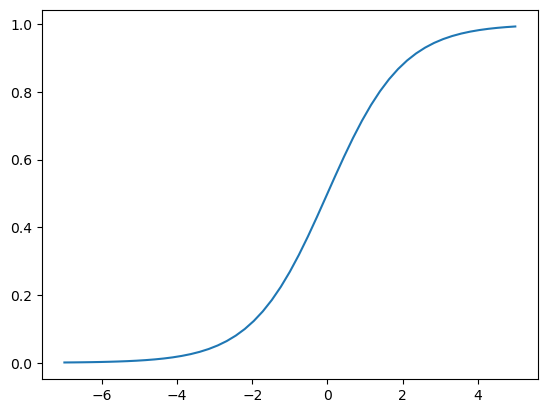

In [109]:
plt.plot(z, sigmoid(z))

In [110]:
#example logistic regression showing similarity to linear regression
def logistic_regression(xi):
    score = w0

    for j in range (len(w)):
        score = score + xi[j] * w[j]

    result = sigmoid(score)
    return result

## 3.10 Training logistic regression with Scikit-Learn
- train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [112]:
#import packages
from sklearn.linear_model import LogisticRegression

In [113]:
#create and train model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [116]:
#get bias
model.intercept_[0]

-0.1090339889680666

In [115]:
#get weights
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [117]:
#hard predictions (1 or 0)
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

In [118]:
#soft predictions (score)
model.predict_proba(X_train)

array([[0.90452211, 0.09547789],
       [0.32067047, 0.67932953],
       [0.36632102, 0.63367898],
       ...,
       [0.46837916, 0.53162084],
       [0.95745651, 0.04254349],
       [0.30127025, 0.69872975]])

1st column is probability of belonging to 0 and 2nd column is probability of belonging to 1

In [121]:
#get only the 2nd column
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.00899664, 0.20452356, 0.21222306, ..., 0.13638836, 0.79977075,
       0.83740807])

In [123]:
#decide on threshold
churn_decision = (y_pred >= 0.5)

For example if we wanted to send a promotional email to customers that are likely to churn we could use this to get the customerid

In [125]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

Now let's check how accurate the predictions are / the performance of the model. Instead of RMSE we use accuracy.

In [126]:
#true values
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [128]:
#predicted values
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [130]:
#check percentage of true vs predicted values matching
(y_val == churn_decision).mean()

0.8034066713981547

In [135]:
#create dataframe to review the probability, prediction, and actual
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual

df_pred

,probability,prediction,actual,correct
0,0.008997,0,0,True
1,0.204524,0,0,True
2,0.212223,0,0,True
3,0.543047,1,1,True
4,0.213786,0,0,True
...,...,...,...,...
1404,0.313673,0,0,True
1405,0.039358,0,1,False
1406,0.136388,0,0,True
1407,0.799771,1,1,True


In [136]:
df_pred.correct.mean()

0.8034066713981547

Correct on average 80% of the time

## 3.11 Model interpretation
- look at the coefficients
- train a smaller model with fewer features

In [140]:
## zip column names with the coefficients in dict
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [144]:
## train a smaller model
small = ['contract', 'tenure', 'monthlycharges']
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [146]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [148]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [149]:
X_train_small = dv_small.transform(dicts_train_small)

In [150]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [153]:
#look at bias
w0 = model_small.intercept_[0]
w0

-2.476775662927698

In [154]:
#look at weights
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [155]:
#join together as above
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

So say we have a customer that is on a month-to-month contract that has been a customer for 5 months and pays $50/month...

w0 + contract coefficients (3) + monthlycharges coefficients + tenure coefficients  
-2.476 + [(1 * (0.97)) + (0 * (-0.025)) + (0 * (-0.949))] + (50 * (0.027)) + (5 * (-0.036))

In [157]:
#in this example here is the predicted churn
sigmoid(-2.47 + 0.97 + 50 * 0.027 + 5 * (-0.036))

0.41824062315816374

Now that we've made sense of the model we will now use it on the data.

## 3.12 Using the model

In [161]:
# get model with all the features and train on full train data
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [164]:
#create dict vectorizer, trasnform X, get y
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
y_full_train = df_full_train.churn.values

In [165]:
#train model
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

Now for test dataset

In [166]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [168]:
y_pred = model.predict_proba(X_test)[:, 1]

In [169]:
#decide on threshold
churn_decision = (y_pred >= 0.5)

In [171]:
#check accuracy
(churn_decision == y_test).mean()

0.815471965933286

Let's take a random customer and see if they will churn

In [173]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

Imagine our model is hosted on the web and we receive a request for this customer.

In [176]:
X_customer = dv.transform([customer])
X_customer.shape

(1, 45)

In [178]:
model.predict_proba(X_customer)[0, 1]

0.4056810977879246

40% probability of churning.  
Let's check if he was actually going to churn..

In [179]:
y_test[10]

0

In this case the model correctly predicted he will not churn.

## 3.13 Summary
- feature importance - risk